In [2]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.signal as sig

In [3]:
def get_data(data_path):
    temp_force = []
    temp_time = []
    with open(data_path,"r") as f:
        for row in f:
            row = row.rstrip().split(",")
            temp_force.append(float(row[0]))
            temp_time.append(float(row[1]))
    
    temp_force = sig.medfilt(temp_force,5)
    temp_force = sig.medfilt(temp_force,5)
    temp_time = sig.medfilt(temp_time,5)
    temp_time = sig.medfilt(temp_time,5)

    return temp_force,temp_time

## 5x5 Blade

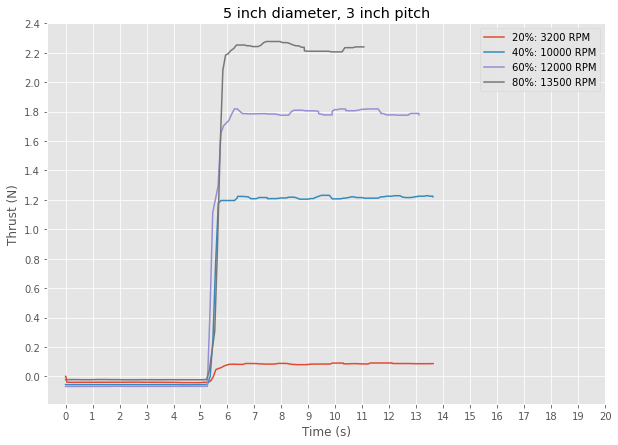

In [14]:
paths_5x5 = ["data/20percent_5x5.txt","data/40percent_5x5.txt","data/60percent_5x5.txt","data/80percent_5x5.txt"]

force_5x5 = []
time_5x5 = []
first = True
for i in paths_5x5:
    temp_force,temp_time = get_data(i)
    if first is True:
        first = False
        temp_force = temp_force[0:-75]
        temp_time = temp_time[0:-75]
    
    force_5x5.append(temp_force)
    time_5x5.append(temp_time)
    
    

plt.style.use('ggplot')
labs = ["20%: 3200 RPM","40%: 10000 RPM", "60%: 12000 RPM", "80%: 13500 RPM"]
fig, ax = plt.subplots(figsize=(10,7))
first = True
for i in range(len(force_5x5)):
    ax.plot(time_5x5[i],force_5x5[i],label=labs[i])
    ax.legend()
ax.set(title="5 inch diameter, 3 inch pitch",xlabel="Time (s)",ylabel="Thrust (N)")
plt.yticks(np.arange(0, 2.6, 0.2))
plt.xticks(np.arange(0, 21.0, 1))
plt.show()

## 8045 Blade

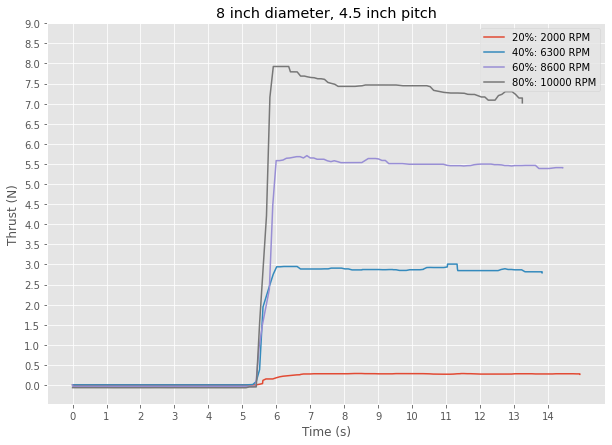

In [17]:
paths_8045 = ["data/20percent_8045.txt","data/40percent_8045.txt","data/60percent_8045.txt","data/80percent_8045_2.txt"]

force_5x5 = []
time_5x5 = []
for i in paths_8045:
    temp_force,temp_time = get_data(i)
    force_5x5.append(temp_force)
    time_5x5.append(temp_time)

plt.style.use('ggplot')
labs = ["20%: 2000 RPM","40%: 6300 RPM", "60%: 8600 RPM", "80%: 10000 RPM"]
fig, ax = plt.subplots(figsize=(10,7))
for i in range(len(force_5x5)):
    ax.plot(time_5x5[i],force_5x5[i],label=labs[i])
    ax.legend()

ax.set(title="8 inch diameter, 4.5 inch pitch",xlabel="Time (s)",ylabel="Thrust (N)")
plt.yticks(np.arange(0, 9.2, 0.5))
plt.xticks(np.arange(0, 15.0, 1))
plt.show()

# ME 378 Test

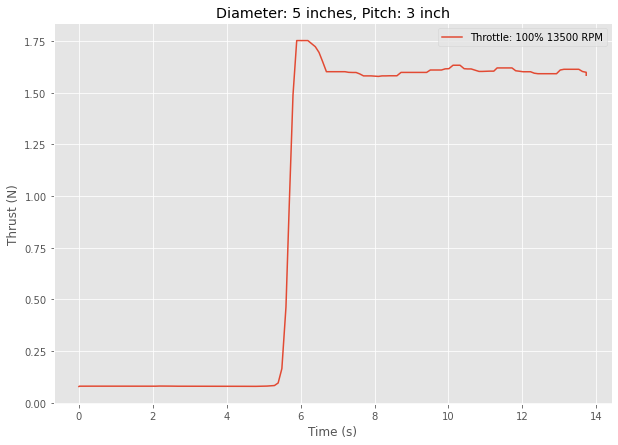

In [32]:
paths_8045 = ["data/fraternities_are_cool.txt"]

force_5x5 = []
time_5x5 = []
for i in paths_8045:
    temp_force,temp_time = get_data(i)
    force_5x5.append(temp_force)
    time_5x5.append(temp_time)

plt.style.use('ggplot')
labs = ["Throttle: 100% 13500 RPM"]
title = [""]
fig, ax = plt.subplots(figsize=(10,7))
for i in range(len(force_5x5)):
    ax.plot(time_5x5[i],force_5x5[i],label=labs[i])
    ax.legend()
ax.set(title="Diameter: 5 inches, Pitch: 3 inch", xlabel="Time (s)",ylabel="Thrust (N)")
plt.show()